In [5]:
!pip install opencv-python

     ---------------------------------------- 38.2/38.2 MB 8.8 MB/s eta 0:00:00


In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76

Importing libraries

In [9]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

Function to convert the colours from RGB format to HEX colour codes

In [10]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

Function to read an image and convert it from BGR to RGB format.
By default when we read an image the colour format is BGR and hence does not match with the original image. That's why we need to convert it to RGB format.

In [11]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    df = pd.DataFrame(modified_image, columns = ['Red','Green','Blue'])
    print(df)

    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)

    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))

    center_colors = clf.cluster_centers_

    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    # We get ordered colors by iterating through the keys

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

In the above function, we first resize the image from (3627, 2720) to (600, 400)
Resizing an image needs a way to calculate pixel values for the new image from the original one. For this we use an interpolation process called - INTER_AREA
INTER_AREA is resampling using pixel area relation. It may be a preferred method for image decimation (downsampling) as it gives more free results.

We then reshape the image in terms of the number of pixels and the RGB combination of each pixel.
Hence if we display the image as a dataframe, we get 240000 rows and 3 columns.

We then use KMeans algorithm to find different clusters. Each cluster has its own data points with almost similar colours. The clusters are predicted and stored in the variable labels, which are then sorted and stored in the variable counts.

We get ordered_colours by iterating through the keys.

        Red  Green  Blue
0         5     34    64
1         5     34    64
2         4     33    64
3         4     32    64
4         6     33    63
...     ...    ...   ...
239995    2      2     4
239996    2      2     4
239997    1      1     3
239998    2      2     4
239999    2      2     4

[240000 rows x 3 columns]


[array([17.38749358, 37.0399272 , 72.64785104]),
 array([165.78873755,  82.20683066,  75.37991462]),
 array([10.74471842,  9.22898505, 18.14109131]),
 array([194.76705122, 146.91360294, 125.00950811]),
 array([85.19767756, 43.07514178, 55.83935323])]

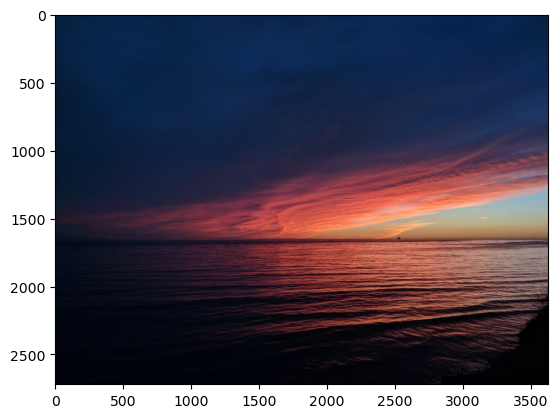

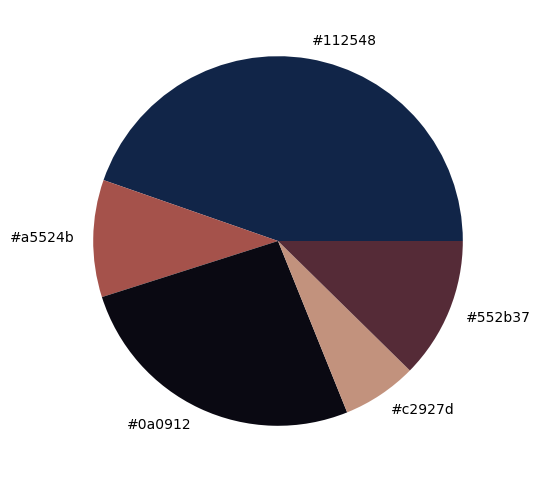

In [12]:
image = cv2.imread('picture1.jpg')


image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

get_colors(get_image('picture1.jpg'), 5, True)